<a href="https://colab.research.google.com/github/Vaishnavi1208/ML-internship-project/blob/master/ML_internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis**


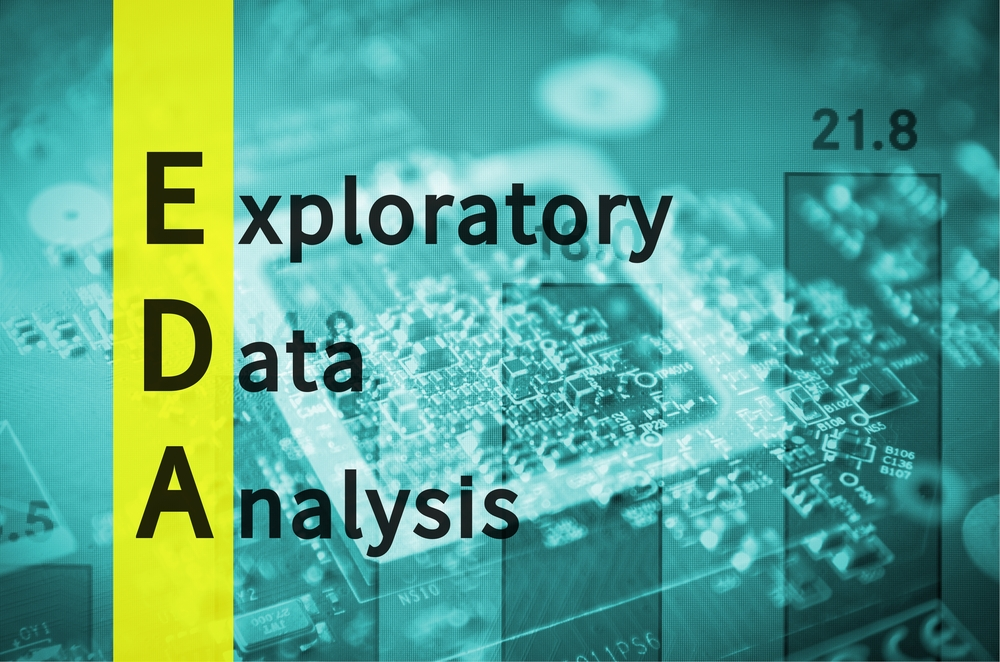

**What is EDA?**

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

**What data are we exploring in this project?**

In this project, we are performing Exploratory Data Analysis on a car dataset. In this dataset there are more than 10k rows and more than 10 columns which contains features such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this project we will explore the data.

## Step 1:

Import the dataset and the necessary libraries, check datatype, statistical summary, shape, null values etc.

**Importing necessary libraries and loading the dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
df=pd.read_csv("data.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Displaying top 5 entries**

In [2]:
#to display top 5
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


**Displaying last 5 entries**

In [3]:
#to display last 5
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**Determining the datatypes of all entries**



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**Checking the statistical summary of the data**

In [5]:
df.describe() #for statistical summary

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [6]:
df.shape

(11914, 16)

**Checking for null values**

In [7]:
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


## Step 2:


Are there any columns in the dataset which you think are of less relevance. If so, give your reasoning and drop them.



*   As we can see above, there are many null values in the columns Market Category. Also, the columns Engine Fuel Type and Number of Doors are irrelevant to perform EDA. So we drop these columns for our ease.



In [8]:
df=df.drop(['Market Category','Engine Fuel Type','Number of Doors'],axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## Step 3:

Rename the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"

**Renaming the columns so that there won't be confusion in reading bigger names.**

In [9]:
df=df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**Total number of rows and columns**

In [10]:
df.shape

(11914, 13)

## Step 4:

Check for any duplicates in the data, check for null values and missing data and remove them.

**Checking for the rows containing duplicate data and dropping them as duplicate values may cause inconvenience.**

In [11]:
duplicate_rows_df=df[df.duplicated()]
print("Number of duplicate rows: ",duplicate_rows_df.shape)

Number of duplicate rows:  (792, 13)


In [12]:
df.count()  #used to count number of rows

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Size     11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64

In [13]:
df=df.drop_duplicates()
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [14]:
df.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

In [15]:
df.shape

(11122, 13)

**Finding and dropping the null values**

In [16]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [17]:
df=df.dropna()
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [18]:
print(df.isnull().sum())    #After dropping the null values

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# Step 5:

Plot graphs of various columns to check for outliers and remove those data points from the dataset.

**Plotting the graphs of data (columns) to detect outliers present in data. Plotting graphs is an easier way to detect outliers.**

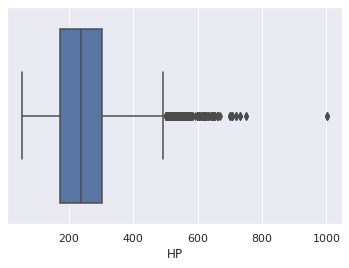

In [19]:
sns.boxplot(x=df['HP'])

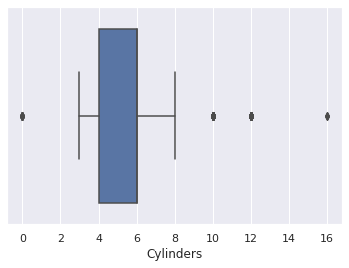

In [20]:
sns.boxplot(x=df['Cylinders'])

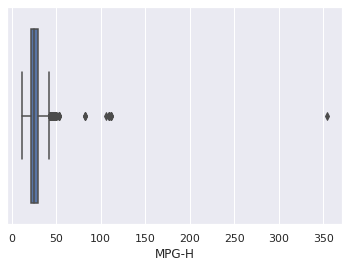

In [21]:
sns.boxplot(x=df['MPG-H'])

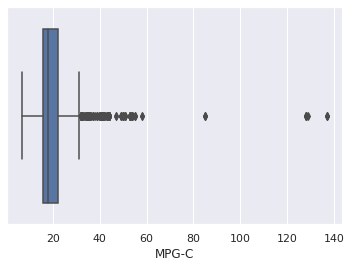

In [22]:
sns.boxplot(x=df['MPG-C'])

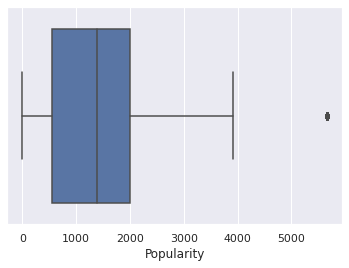

In [23]:
sns.boxplot(x=df['Popularity'])

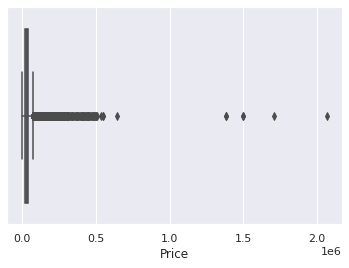

In [24]:
sns.boxplot(x=df['Price'])

**Dropping the outliers.**

In [25]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
iqr

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64

In [26]:
df=df[~((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr))).any(axis=1)]

In [27]:
df.shape

(8546, 13)

# Step 6:

What car brands are the most represented in the dataset and find the average price among the top car brands.

**Finding the most represented car brand in the dataset.**

In [28]:
df["Make"].value_counts()

Chevrolet        1027
Toyota            569
Volkswagen        515
Nissan            513
GMC               469
Dodge             425
Mazda             378
Honda             373
Suzuki            339
Infiniti          322
Cadillac          300
Hyundai           242
Audi              240
Volvo             236
Acura             232
Subaru            220
BMW               218
Kia               216
Buick             184
Mitsubishi        179
Chrysler          173
Mercedes-Benz     170
Lexus             163
Pontiac           156
Lincoln           142
Saab              109
Oldsmobile        105
Land Rover         89
FIAT               59
Scion              55
Plymouth           43
Porsche            36
Lotus              20
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Make, dtype: int64

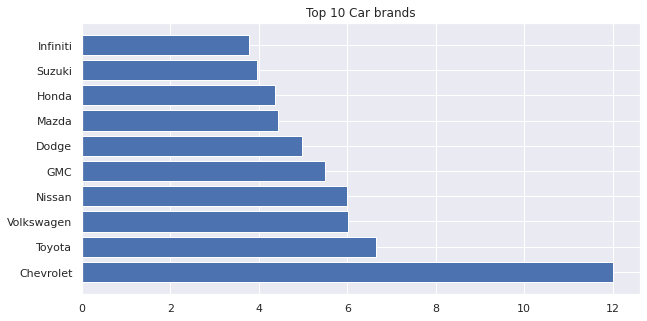

In [29]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

**Finding the average price among the top car brands**

In [30]:
prices=df[['Make','Price']].loc[(df['Make']=='Chevrolet')|(df['Make']=='Suzuki')|(df['Make']=='Volkswagen')|(df['Make']=='Toyota')|(df['Make']=='Dodge')|(df['Make']=='Nissan')|(df['Make']=='GMC')|(df['Make']=='Honda')|(df['Make']=='Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Suzuki      18168.241888
Toyota      27769.421793
Volkswagen  29032.817476


## Step 7:

Plot the correlation matrix and document your insights.

**Correlation matrix**

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [31]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


**Heatmap:**

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables. Here we plot a heatmap to find the correlation between different attributes of data.

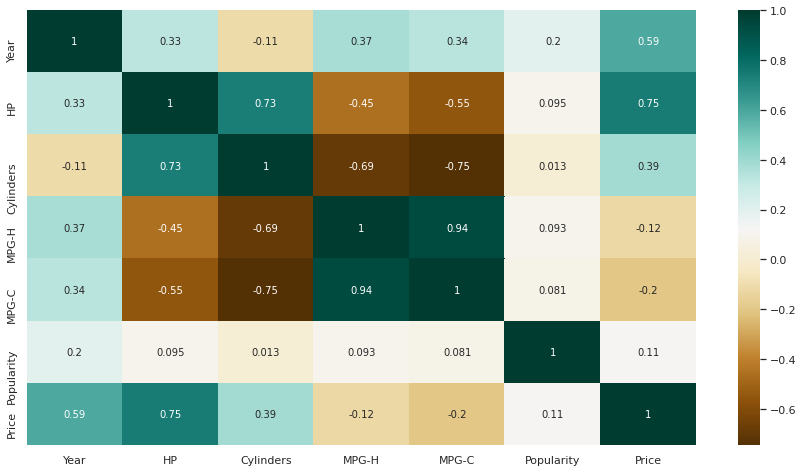

In [32]:
plt.figure(figsize=(15,8))
cmatrix=df.corr()
sns.heatmap(cmatrix,cmap="BrBG",annot=True)

**From above heatmap we can infer that there is:**

**High correlation between:**


*  Cylinders & HP.
*  Highway MPG & City MPG.



i.e., greater the number of cylinders, more is the power of the car.

**High anticorrelation between:**



*   Cylinders & highway MPG & city MPG.


i.e., cylinders have a strong negative correlation with the city & highway MPG because lower MPG figures means higher fuel consumption.


# Step 8:

Perform EDA and plot different graphs and document your findings (Try to see how other variables affect the price of the car).



## **Scatter plot:**

Scatter plots' primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole. Here we plot a scatter plot between **Horsepower** and **Price**.




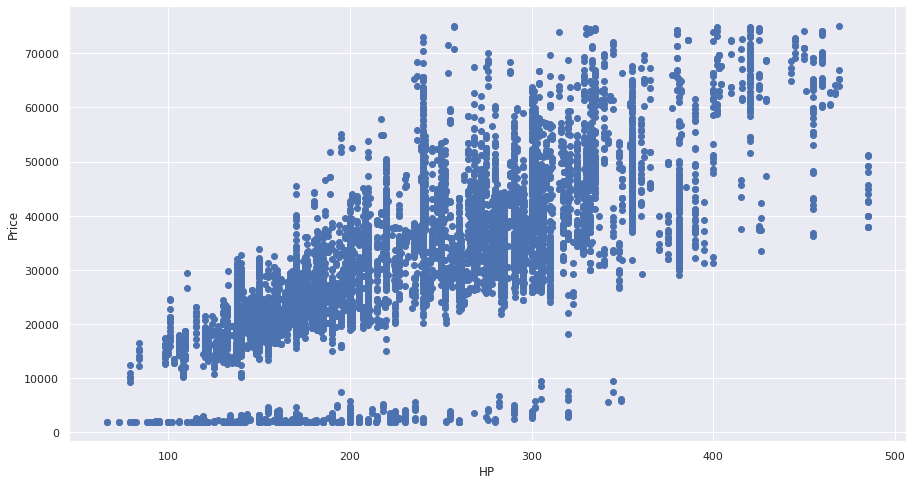

In [33]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

## **Histogram:**

A histogram is used to plot the frequency of score occurrences in a continuous data set that has been divided into classes, called bins. Here we plot a histogram to find **Number of cars by their make**.

Text(0.5, 0, 'Make')

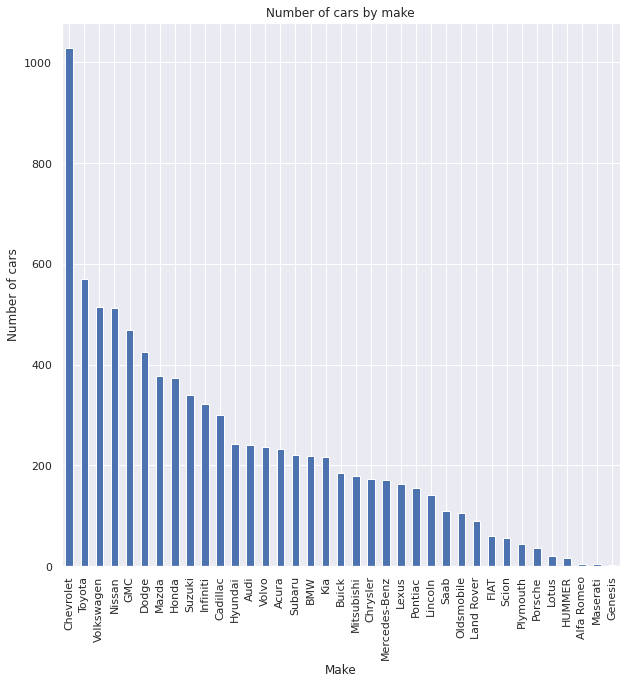

In [34]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,10))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

## **Bar graph:**

A bar diagram makes it easy to compare sets of data between different groups at a glance. The graph represents categories on one axis and a discrete value in the other. The goal is to show the relationship between the two axes. Bar charts can also show big changes in data over time.

We plot a horizontal bar graph to see which vehicle type of cars is sold most.

Text(0.5, 0, 'Body type')

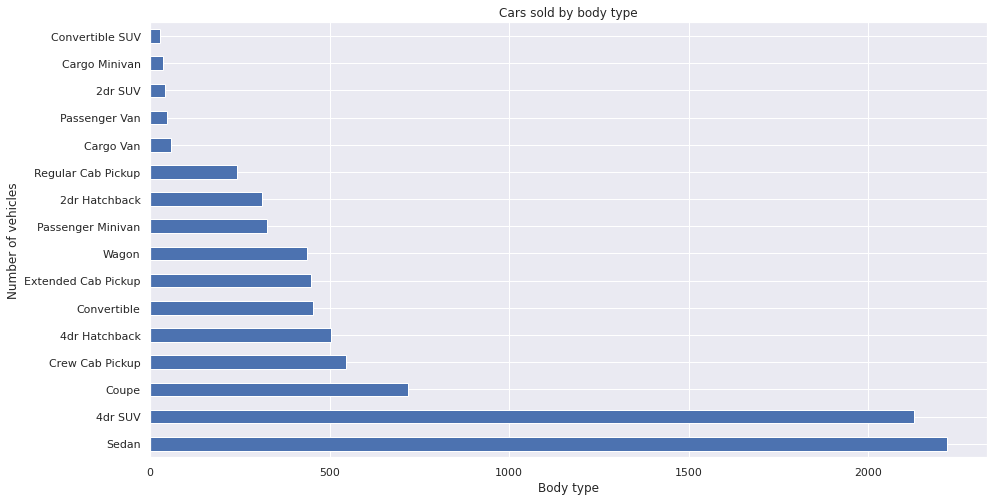

In [35]:
df['Vehicle Style'].value_counts().plot.barh(figsize=(15,8))
plt.title('Cars sold by body type')
plt.ylabel('Number of vehicles')
plt.xlabel('Body type')

*   This bar graph clearly shows that **Sedan** cars are sold most.


We plot a bar graph to find the rise in car prices over past years.



Text(0.5, 0, 'Year')

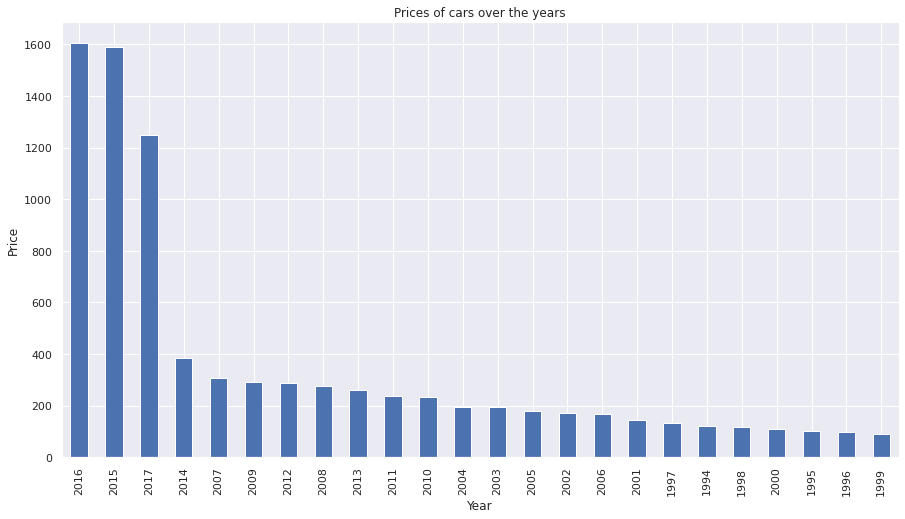

In [36]:
df['Year'].value_counts().plot.bar(figsize=(15,8))
plt.title('Prices of cars over the years')
plt.ylabel('Price')
plt.xlabel('Year')



*  This graph shows us clearly that the price of cars has started to rise after the year 2001. 